In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

C:\Users\karla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\karla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


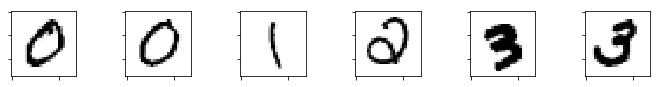

In [3]:
#Let's take a look at the data and see what it looks like
fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(X[ii*4700].reshape((28,28)), cmap='Greys')

In [4]:
#Part a: Components
#PCA is valuable to lower dimensionality, so we will see the impact of choosing different numbers of components
#to use
X.shape

(70000, 784)

In [5]:
from sklearn.decomposition import PCA

#PCA using 2 components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
print("Shape {}:".format(X_2dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape (70000, 2):
Variance Explained by Component: [0.09746116 0.07155445]
Total Variance Explained: 0.16901560460409157


In [6]:
#PCA using 3 components
pca = PCA(n_components=3)
X_3dim = pca.fit_transform(X)
print("Shape: {}".format(X_3dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape: (70000, 3)
Variance Explained by Component: [0.09746116 0.07155445 0.06149531]
Total Variance Explained: 0.2305109146499827


Text(0.5, 1.0, 'Progression of Variance Explained by Component Addition')

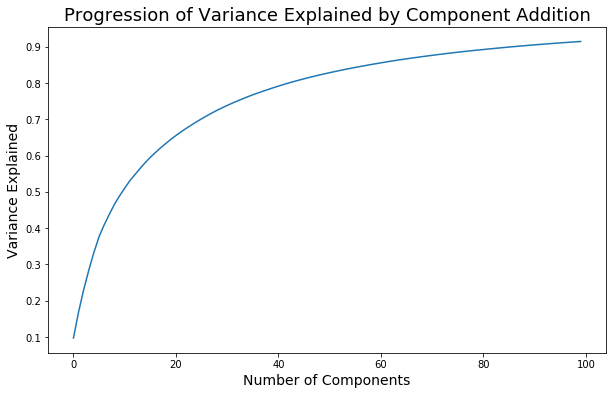

In [7]:
#Using few components is nice, but loses too much data, so I will arbitrarily jump up to 100 to see how it compares
#100 components is the max for this plot
pca = PCA(n_components=100)
running_pca = pca.fit_transform(X)

#We are going to calculate the variance explained at each step to monitor our progression
cumulative = np.cumsum(pca.explained_variance_ratio_)
f, ax = plt.subplots(figsize = (10,6))
plt.plot(range(len(cumulative)),cumulative)
plt.ylabel("Variance Explained",fontsize = 14)
plt.xlabel("Number of Components",fontsize = 14)
plt.title("Progression of Variance Explained by Component Addition",fontsize = 18)

In [8]:
#PCA with 70% variance explained
pca = PCA(n_components=.7)
dim_reduct = pca.fit_transform(X)
print("Shape: {}".format(dim_reduct.shape))

Shape: (70000, 26)


Text(0.5, 1.0, 'Separation With Two Components')

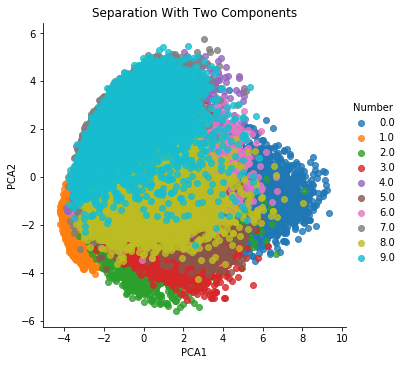

In [9]:
#26 is the magic number of components to use
#But now I will go back to the model of PCA with two components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

#Convert data to pandas DataFrame for easier plotting
data = pd.DataFrame(X_2dim,columns=['PCA1','PCA2'])
#Add labels
data['Number'] = y
sns.lmplot(x='PCA1', y='PCA2', data=data,hue='Number',fit_reg=False)
plt.title("Separation With Two Components")

In [10]:
#part c: Pros and Cons
#pros: PCA is very versitile and can be use on almost any dataset. It also ensures we get the best possible
#reduction in dimensionality. Another plus is that PCA is reversable and can be undone at any time
#cons: there can be huge problems if there are too many categorical variables. Also, If you reduce
#dimensionality too much, the results can be hard to interpret and innacurate

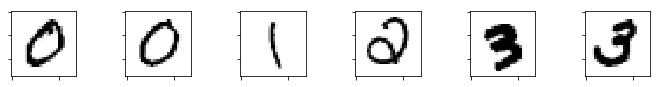

In [11]:
#part d - plotting original versus compressed
fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(X[ii*4700].reshape((28,28)), cmap='Greys')

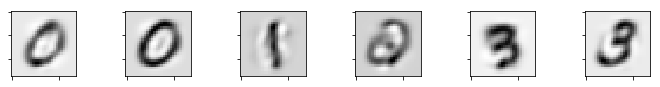

In [12]:
#PCA with 26 components
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_26dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 4700
    plt.imshow(reverse[ii*4700].reshape((28,28)), cmap='Greys')

In [13]:
from sklearn.manifold import TSNE

In [14]:
#part a
#PCA with 26 components so that TSNE does not have to do too much work
pca = PCA(n_components=26)
X_26dim = pca.fit_transform(X)

#Randomize entries in the original data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Fit our data to the TSNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 6.916s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.417962
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.543625
[t-SNE] KL divergence after 1000 iterations: 1.793535


Text(0.5, 1.0, 'TSNE 2D Plot')

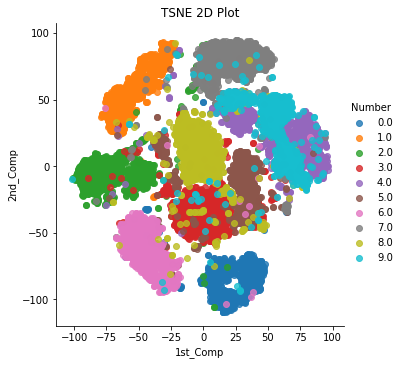

In [15]:
#For ease of plotting, we create a Pandas DataFrame
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE 2D Plot")

In [16]:
#part b: perplexity
#Lower Perplexity
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Perplexity of 5')

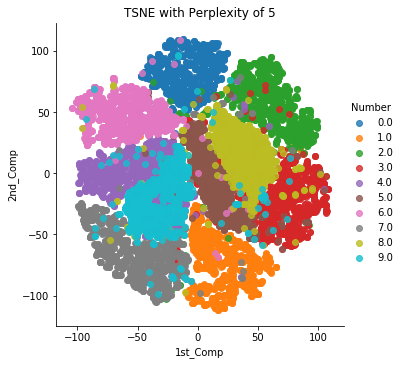

In [17]:
#Perplexity 5 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 5")

In [18]:
#Higher Perplexity
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Perplexity of 50')

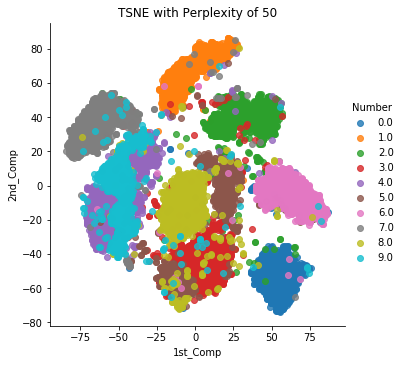

In [19]:
#Perplexity 50 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 50")

In [20]:
#part c: learning rates and iterations
#Lower number of iterations
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=500, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with 500 Iterations')

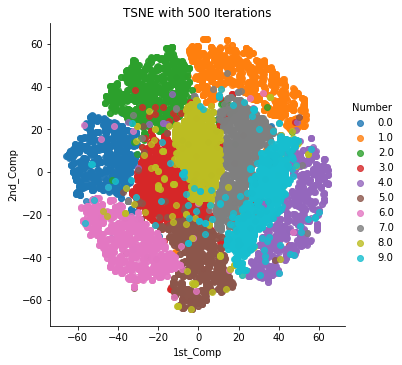

In [21]:
#Lower n_iter plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with 500 Iterations")

In [22]:
#Lower learning rate
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=200)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Learning Rate of 200')

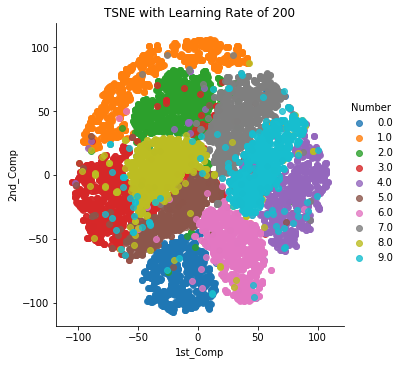

In [23]:
#Lower learning_rate plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Learning Rate of 200")

In [24]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

In [25]:
#part a: choosing K
#Define our kmeans model
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
k_clusters = kmeans.predict(X)

In [27]:
#part b: Evaluation
print("Adjusted Rand Score: {}".format(adjusted_rand_score(y, k_clusters)))

Adjusted Rand Score: 0.36373591960872337


In [28]:
print("Completeness Score: {}".format(completeness_score(y, k_clusters)))

Completeness Score: 0.485345705372278


Text(0.5, 1.0, 'Truth')

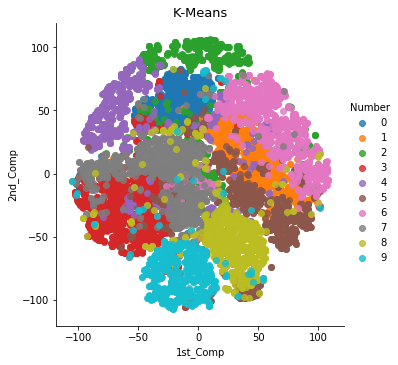

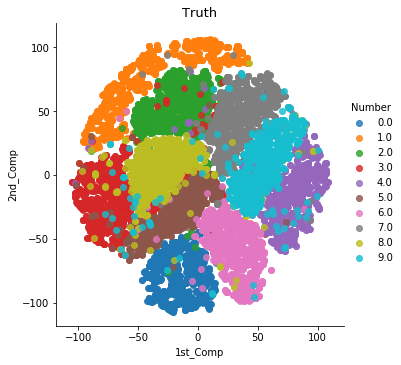

In [29]:
#part c: plotting K-Means with TSNE
# K-Means Clustering
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Apply K-Means numbers
df_kmeans['Number'] = k_clusters[rows[:n_select]]

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("K-Means",fontsize=13)
#Plot True labels
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("Truth",fontsize=13)

In [30]:
#part d: Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [31]:
scaler.fit(X)
scaled = scaler.transform(X)

In [32]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Completeness Score: 0.4420951647256873


Text(0.5, 1.0, 'Scaled K-Means')

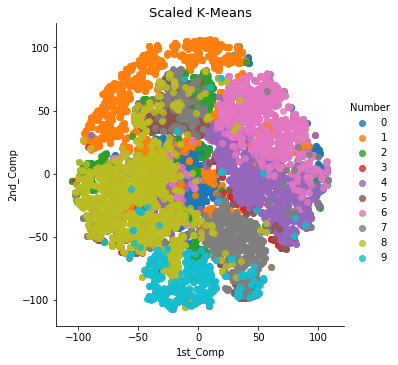

In [33]:
sk_clusters = kmeans.predict(scaled)
# K-Means Clustering
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Apply K-Means numbers
df_kmeans['Number'] = sk_clusters[rows[:n_select]]

print("Completeness Score: {}".format(completeness_score(y,sk_clusters)))

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("Scaled K-Means",fontsize=13)

In [46]:
#part e: Robustness checks
def robust_check(size):
    for num in range(4):
        np.random.seed(seed=num)
        rows = np.arange(70000)
        np.random.shuffle(rows)
        n_select=size
        tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=500)
        results = tsne.fit_transform(X_26dim[rows[:n_select],:])
        kmeanss = kmeans.fit(X[rows[:n_select],:])
        k_clusters = kmeanss.predict(X)
        df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
        df['Number'] = k_clusters[rows[:n_select]]
        sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df,hue='Number',fit_reg=False)
        plt.title("Random Sample of size {}".format(size))

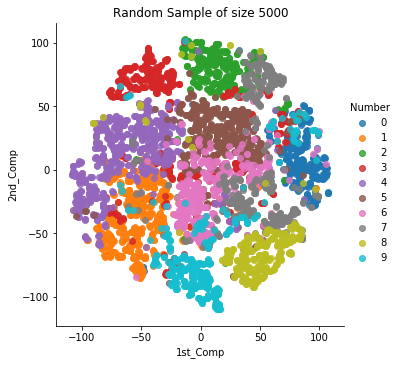

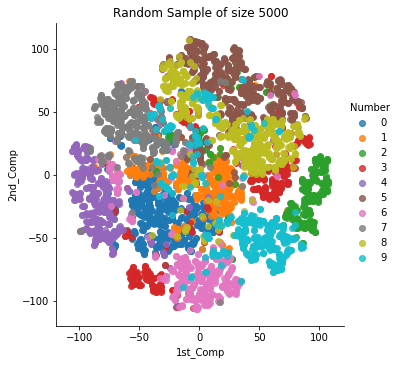

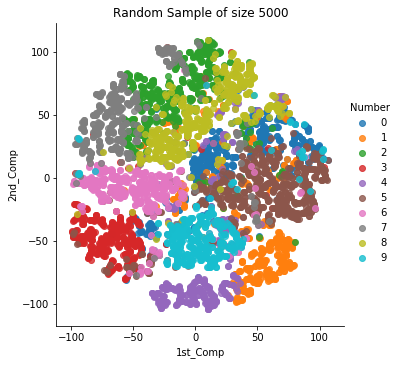

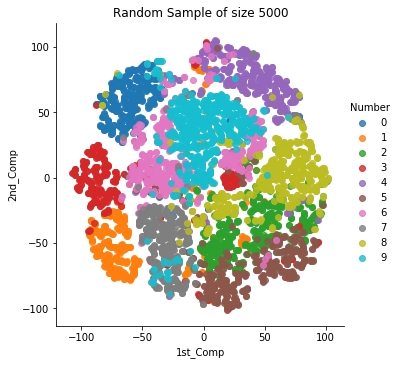

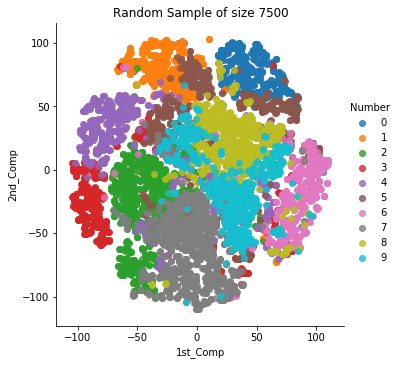

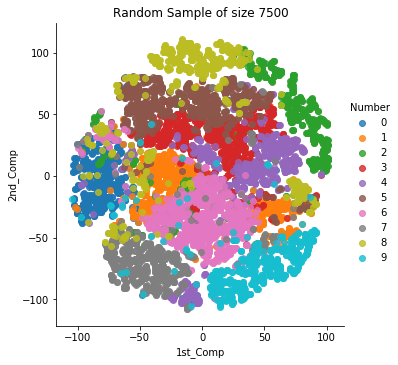

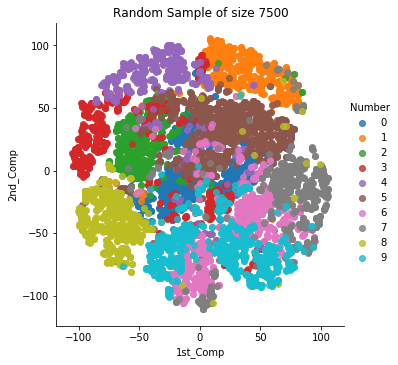

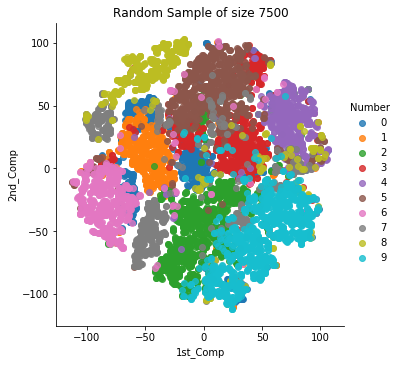

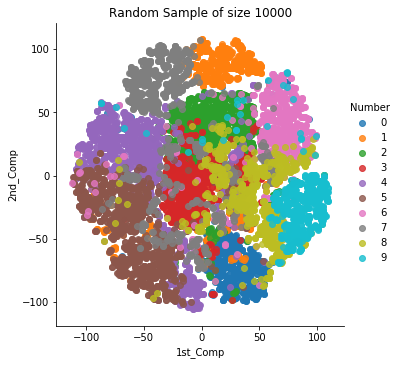

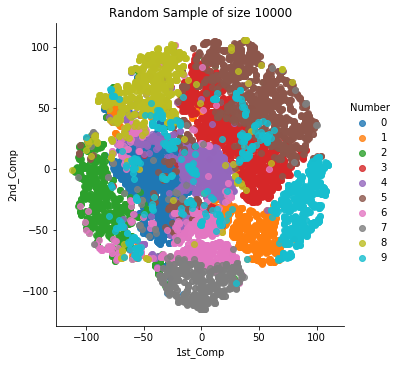

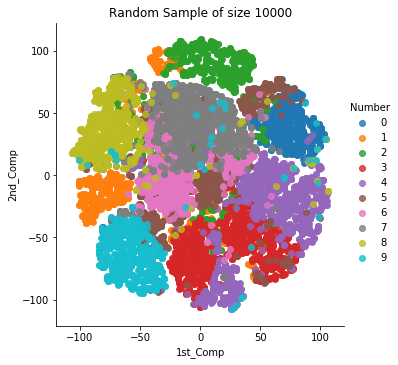

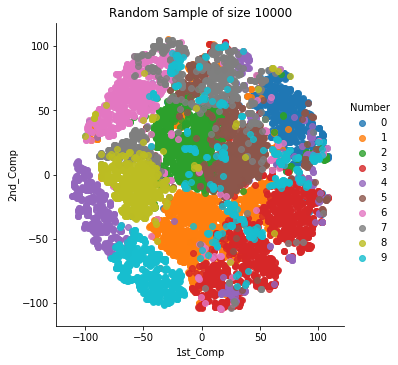

In [41]:
#Loop over random sample sizes
for size in [5000,7500,10000]:
    robust_check(size)

In [47]:
#hierarchal clustering
from scipy.cluster.hierarchy import dendrogram, linkage

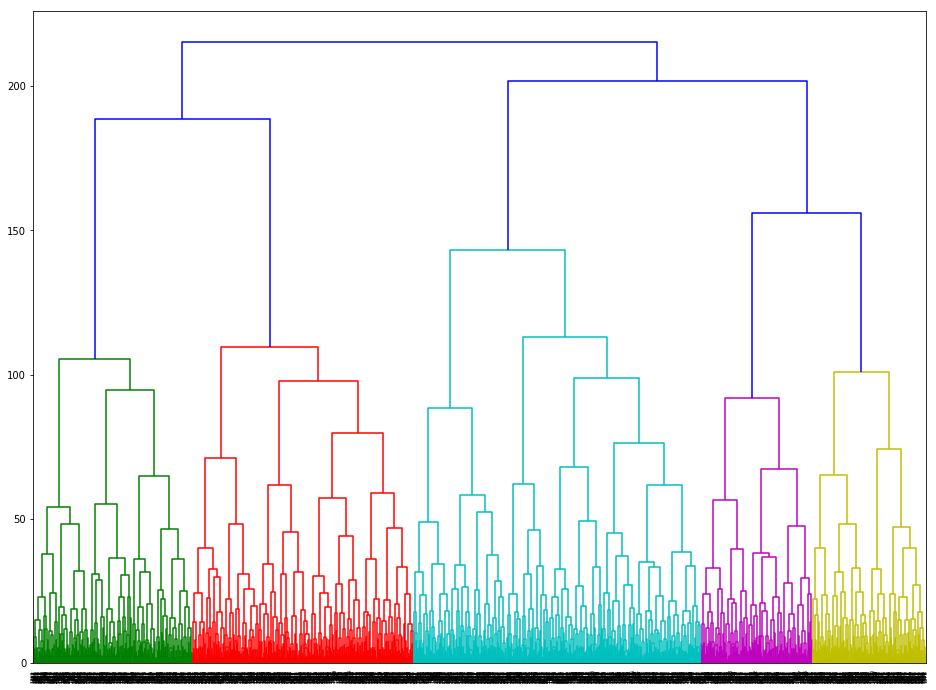

In [49]:
#part a: plotting a dendrogram
df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
dfsub = df.sample(n = 2500)
complete_link = linkage(dfsub, 'complete')
plt.figure(figsize=(16, 12))
dn_c = dendrogram(complete_link)

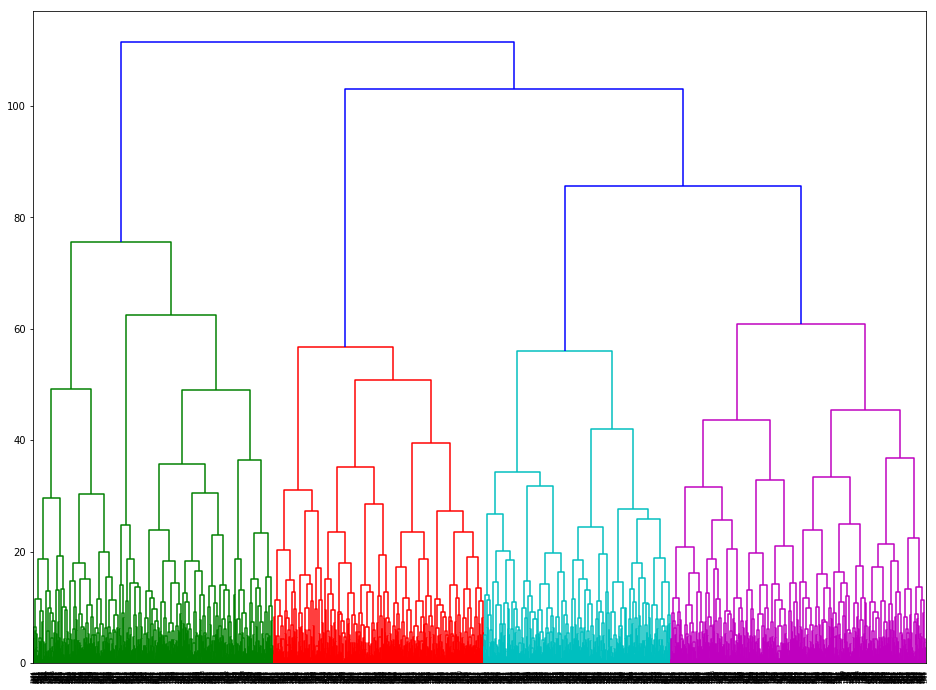

In [50]:
#part c: different linkage methods
avg_link = linkage(dfsub, 'average')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)

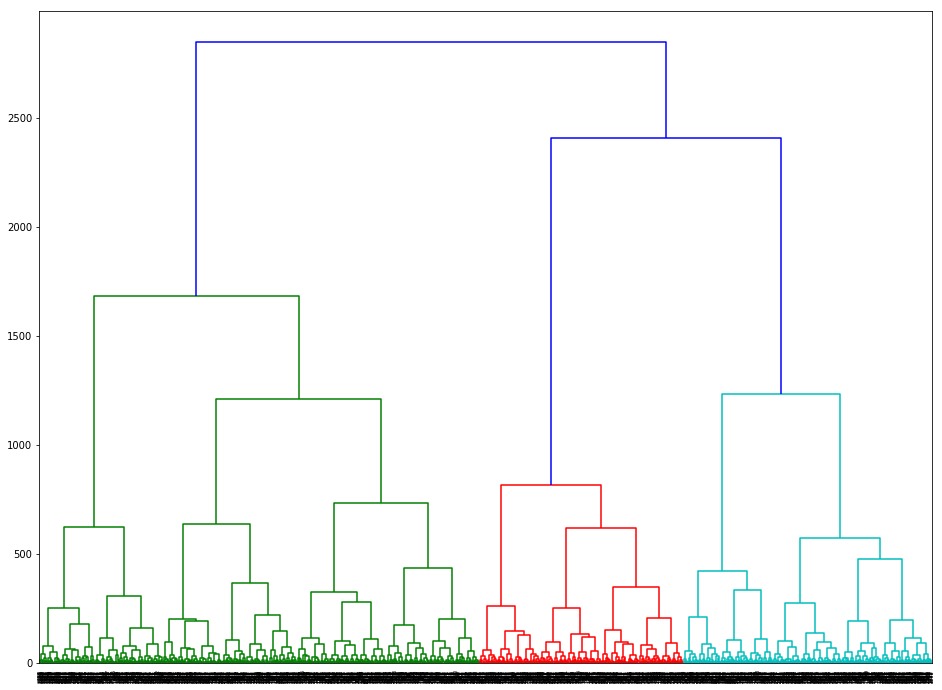

In [51]:
avg_link = linkage(dfsub, 'ward')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)
